In [496]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [498]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [499]:
data5 = pd.read_csv('/content/drive/MyDrive/Dataset/dataset5.csv')
data6 = pd.read_csv('/content/drive/MyDrive/Dataset/dataset6.csv')

In [500]:
data5=data5.drop(['ip.src', 'ip.dst','frame.encap_type','frame.protocols'],axis=1)
data6=data6.drop(['ip.src', 'ip.dst','frame.encap_type','frame.protocols'],axis=1)

In [501]:
#print(data5.columns)

In [502]:
# data.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
#        'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
#        'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
#        'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
#        'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
#        'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
#        'tcp.time_delta','class']

In [503]:
#data5[0:15]

In [504]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [505]:
X5= data5[features].values
Y5= data5['class']
X6= data5[features].values
Y6= data5['class']
X=np.concatenate((X5,X6))
Y=np.concatenate((Y5,Y6))

In [506]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [507]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1


In [508]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [509]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:X.shape[0]], test_size = 0.2)

In [510]:
def create_baseline():
    model = Sequential()
    
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2',input_shape=(25, features), return_sequences=False)))
    # model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    # model.add(LSTM(64, activation='tanh', kernel_regularizer='l2', return_sequences=True))
    # model.add(LSTM(64, activation='tanh', kernel_regularizer='l2', return_sequences=True))
    # model.add(LSTM(64, activation='tanh', kernel_regularizer='l2'))
    

    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [511]:
model = create_baseline()

In [512]:
# model.build()
# model.summary()

In [513]:
Y_train = np.asarray(Y_train).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

In [514]:
history = model.fit(X_train, Y_train, epochs = 40,validation_split=0.2, verbose = 1)

Epoch 1/40
36/36 [==============================] - 5s 47ms/step - loss: 2.3499 - accuracy: 0.8589 - val_loss: 1.2396 - val_accuracy: 0.9826
Epoch 2/40
36/36 [==============================] - 1s 23ms/step - loss: 1.0851 - accuracy: 0.9714 - val_loss: 0.6243 - val_accuracy: 0.9861
Epoch 3/40
36/36 [==============================] - 1s 23ms/step - loss: 0.5787 - accuracy: 0.9695 - val_loss: 0.3270 - val_accuracy: 0.9861
Epoch 4/40
36/36 [==============================] - 1s 23ms/step - loss: 0.2991 - accuracy: 0.9838 - val_loss: 0.1999 - val_accuracy: 0.9861
Epoch 5/40
36/36 [==============================] - 1s 24ms/step - loss: 0.2064 - accuracy: 0.9796 - val_loss: 0.1383 - val_accuracy: 0.9861
Epoch 6/40
36/36 [==============================] - 1s 34ms/step - loss: 0.1754 - accuracy: 0.9781 - val_loss: 0.1139 - val_accuracy: 0.9861
Epoch 7/40
36/36 [==============================] - 1s 23ms/step - loss: 0.1081 - accuracy: 0.9866 - val_loss: 0.1058 - val_accuracy: 0.9861
Epoch 8/40
36

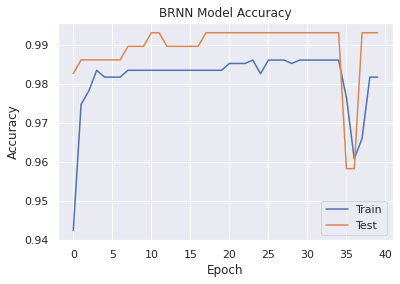

In [515]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN Model Accuracy.png')
plt.show()

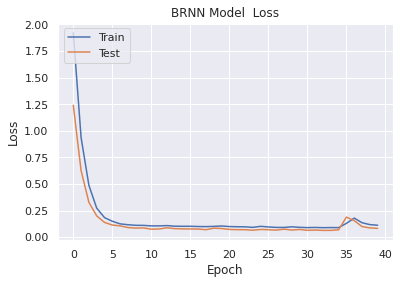

In [516]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()

In [517]:
predict = model.predict(X_test, verbose=1)

12/12 [==============================] - 1s 6ms/step


In [518]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1


In [523]:
target_names = ['attack', 'normal']
print(classification_report(Y_testn, predictn, target_names=target_names))

# len(predictn)

# #len(Y_testn)
# len(predict)
# predict[0:2]
# #len(X_test)
# #X_test[0:1]

              precision    recall  f1-score   support

      attack       0.98      0.99      0.98       324
      normal       0.90      0.80      0.85        35

    accuracy                           0.97       359
   macro avg       0.94      0.90      0.92       359
weighted avg       0.97      0.97      0.97       359



In [520]:
predict.flatten()[0:10]

array([0.01916561, 0.01894689, 0.01879027, 0.02362525, 0.01920909,
       0.01787695, 0.01941195, 0.02089348, 0.02393267, 0.01904821],
      dtype=float32)

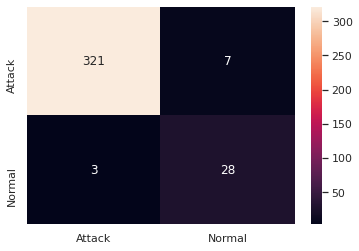

In [521]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [522]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.21%
